In [1]:
!pip install category_encoders


In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
start_time = datetime.now()


import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6


# Plotly visualizations
from plotly import tools
# import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.offline as pyo
import plotly.express as px
init_notebook_mode(connected=True)

# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# For undersamping
from imblearn.under_sampling import RandomUnderSampler

# for encoding and normalization
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold

# import lightgbm as lgb
import math
import itertools as it
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Other machine learning tools

from sklearn.feature_selection import RFECV
import scipy.stats as sps

from sklearn.ensemble import BaggingClassifier

print('LOADING DURATION: ', datetime.now() - start_time)


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

LOADING DURATION:  0:00:32.178671


In [3]:
start_time_proyecto = datetime.now()

start_time_pd = datetime.now()

df = pd.read_csv(
    "D:/smart-loan-recovery/data/raw/accepted_2007_to_2018Q4.csv")

df = df.dropna(subset=["loan_status"])

In [4]:
df.shape

(2260668, 151)

In [5]:
complete_df = df.sample(n=100000, random_state=42)

In [6]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
complete_df['loan_condition_int'] = complete_df['loan_status'].apply(
    lambda status: 1 if status in bad_loan else 0).astype(int)
complete_df['loan_condition'] = np.where(
    complete_df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

# emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
complete_df['emp_length_int'] = complete_df['emp_length'].map(
    emp_length_mapping)
complete_df.head().transpose()

# region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
complete_df['region'] = complete_df['addr_state'].map(state_to_region)
complete_df.head().transpose()

,1758074,686539,900731,1727935,539695
id,9785323,78558461,110757806,96668860,118207599
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt_inv,28000.0,10650.0,18000.0,3975.0,4800.0
...,...,...,...,...,...
settlement_term,NaN,NaN,NaN,NaN,NaN
loan_condition_int,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan
emp_length_int,10.0,10.0,9.0,2.0,0.5


In [7]:
EDA_df = complete_df.copy()

EDA_cat_columns = EDA_df.select_dtypes(include=['object']).columns.tolist()
EDA_num_columns = EDA_df.select_dtypes(exclude=['object']).columns.tolist()

# Filter categorical columns with unique value count less than or equal to the specified threshold.
filtered_EDA_cat_columns = [
    col for col in EDA_cat_columns if EDA_df[col].nunique() <= 50]

In [8]:
def plot_variable_distribution(dataframe, variable_name):
    if dataframe[variable_name].dtype == 'object':
        # Categorical variables, draw a histogram
        sns.countplot(x=variable_name, data=dataframe)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {variable_name}')
    else:
        # Numeric variables, plot histograms
        sns.histplot(dataframe[variable_name], kde=True)
        plt.xlabel(variable_name)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {variable_name}')
    plt.show()

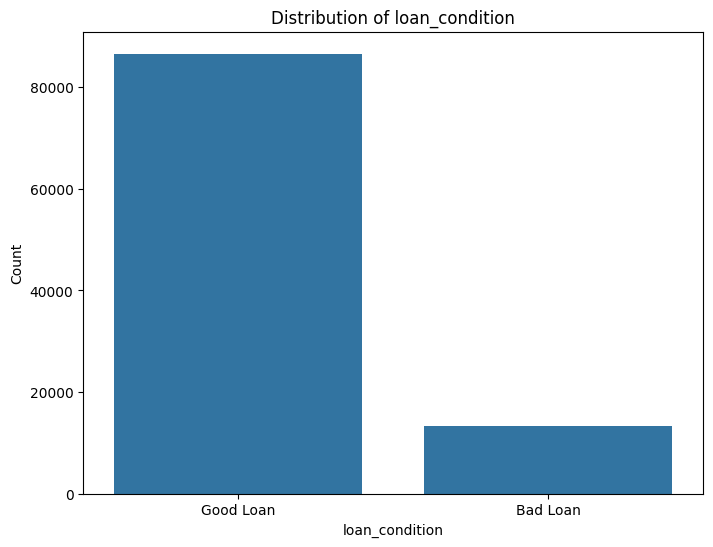

In [9]:
# @param ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'loan_condition_int', 'loan_condition', 'emp_length_int', 'region'] {allow-input: true}
variable = "loan_condition"
plot_variable_distribution(EDA_df, variable)

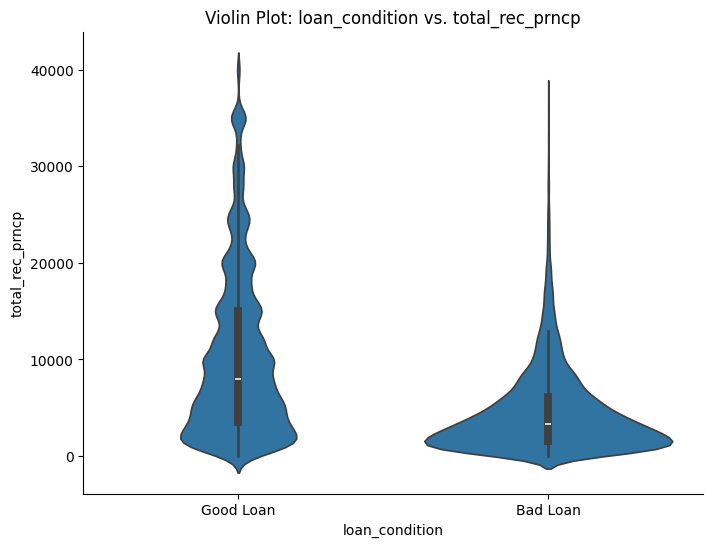

In [10]:
def plot_2_variable_relationship(dataframe, x_variable, y_variable):
    if dataframe[x_variable].dtype != 'object' and dataframe[y_variable].dtype != 'object':
        # Two numerical variables, draw a scatter plot
        sns.scatterplot(x=x_variable, y=y_variable, data=dataframe)
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)
        plt.title(f'Scatter Plot: {x_variable} vs. {y_variable}')
    elif dataframe[x_variable].dtype == 'object' and dataframe[y_variable].dtype == 'object':
        # Two categorical variables, draw a crosstab
        # Show column summary percentage
        cross_tab = pd.crosstab(
            index=dataframe[x_variable], columns=dataframe[y_variable], normalize='columns')
        sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
        plt.xlabel(y_variable)
        plt.ylabel(x_variable)
        plt.title(f'Cross Tabulation: {x_variable} vs. {y_variable}')
    elif (dataframe[x_variable].dtype != 'object' and dataframe[y_variable].dtype == 'object') or (dataframe[x_variable].dtype == 'object' and dataframe[y_variable].dtype != 'object'):
        # One categorical variable, one numerical variabl"e, draw a violin plot
        if dataframe[x_variable].dtype != 'object':
            # Swap the order of the variables and make sure Y is a numeric variable
            x_variable, y_variable = y_variable, x_variable
        sns.violinplot(x=x_variable, y=y_variable, data=dataframe)
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)
        plt.title(f'Violin Plot: {x_variable} vs. {y_variable}')
        sns.despine()
    else:
        print("Unsupported combination of variable types")


X = "loan_condition"
Y = "total_rec_prncp"

plot_2_variable_relationship(EDA_df, X,Y) 

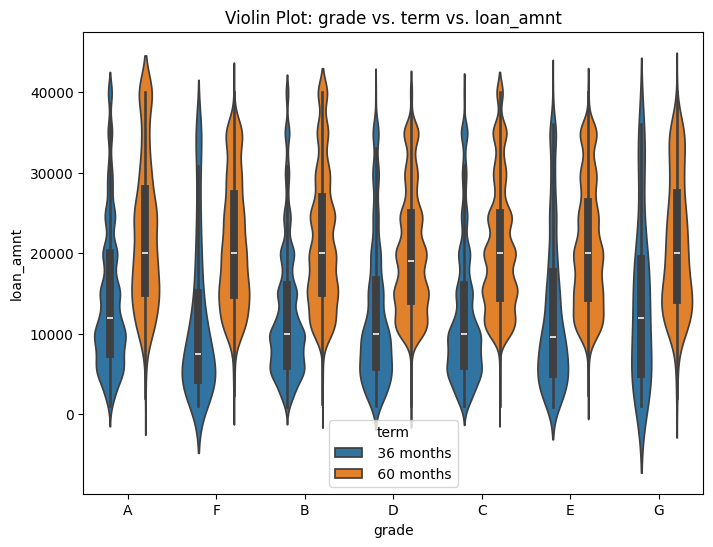

In [11]:
def plot_3_variable_relationship(dataframe, x1_variable, x2_variable, y_variable):
    num_types = ['int64', 'float64']

    if (dataframe[x1_variable].dtype == 'object' and
        dataframe[x2_variable].dtype == 'object' and
            dataframe[y_variable].dtype == 'object'):
        # Three categorical variables, draw a crosstab
        cross_tab = pd.crosstab(index=dataframe[x1_variable], columns=[
                                dataframe[x2_variable], dataframe[y_variable]], normalize='columns')
        sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
        plt.xlabel(f'{x2_variable} - {y_variable}')
        plt.ylabel(x1_variable)
        plt.title(
            f'Cross Tabulation: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype == 'object' and
          dataframe[x2_variable].dtype == 'object' and
          dataframe[y_variable].dtype in num_types):
        # X1 and X2 are categorical, Y is a numerical variable, draw a violin plot or boxplot
        # Example: Drawing a Violin Plot
        sns.violinplot(x=x1_variable, y=y_variable,
                       hue=x2_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(y_variable)
        plt.title(
            f'Violin Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype in num_types and
          dataframe[x2_variable].dtype in num_types and
          dataframe[y_variable].dtype == 'object'):
        # X1 and X2 are numerical variables, Y is a categorical variable, draw a box plot or violin plot
        # Example: Drawing a Violin Plot
        sns.boxplot(x=x1_variable, y=y_variable,
                    hue=x2_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(y_variable)
        plt.title(
            f'Box Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype in num_types and
          dataframe[x2_variable].dtype in num_types and
          dataframe[y_variable].dtype in num_types):
        # Three numerical variables, draw a scatter plot
        sns.scatterplot(x=x1_variable, y=x2_variable,
                        hue=y_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(x2_variable)
        plt.title(
            f'Scatter Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif ((dataframe[x1_variable].dtype == 'object' and dataframe[x2_variable].dtype in num_types) or
          (dataframe[x1_variable].dtype in num_types and dataframe[x2_variable].dtype == 'object')):
        # One of X1 and X2 is a categorical variable and the other is a numerical variable
        if dataframe[y_variable].dtype == 'object':
            # Y is a categorical variable, draw a boxplot or violin plot
            sns.boxplot(x=x1_variable, y=x2_variable,
                        hue=y_variable, data=dataframe)
            plt.xlabel(x1_variable)
            plt.ylabel(x2_variable)
            plt.title(
                f'Box Plot: {x1_variable} vs. {x2_variable} with Color-Coded {y_variable}')
        elif dataframe[y_variable].dtype in num_types:
            # Y is a numerical variable, draw a box plot or violin plot
            sns.boxplot(x=x1_variable, y=x2_variable, data=dataframe)
            plt.xlabel(x1_variable)
            plt.ylabel(x2_variable)
            plt.title(f'Box Plot: {x1_variable} vs. {x2_variable}')
    else:
        print("Unsupported combination of variable types")


X1 = "grade"
X2 = "term"
Y = "loan_amnt"

plot_3_variable_relationship(EDA_df, X1,X2,Y)

In [12]:
complete_df.dtypes

id                     object
member_id             float64
loan_amnt             float64
funded_amnt           float64
funded_amnt_inv       float64
                       ...   
settlement_term       float64
loan_condition_int      int64
loan_condition         object
emp_length_int        float64
region                 object
Length: 155, dtype: object

In [13]:
pd.value_counts(complete_df.loan_status).to_frame().reset_index()

,loan_status,count
0,Fully Paid,47718
1,Current,38822
2,Charged Off,11868
3,Late (31-120 days),946
4,In Grace Period,335
5,Late (16-30 days),185
6,Does not meet the credit policy. Status:Fully ...,88
7,Does not meet the credit policy. Status:Charge...,36
8,Default,2


In [14]:
drop_df = complete_df
drop_df = complete_df[~complete_df['loan_status'].isin(['Current', 'Issued',
                                                        #  'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
                                                        # 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'
                                                        ])]

In [15]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(
        by='Missing Count', ascending=False)  # 改
    return missing_values


def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values': input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] >
                             0].sort_values(by='#Count', ascending=False)

    return missing_values


# Finding the the count and percentage of values that are missing.
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
member_id,61178,100.000000,float64
orig_projected_additional_accrued_interest,60930,99.594626,float64
sec_app_mths_since_last_major_derog,60832,99.434437,float64
payment_plan_start_date,60824,99.421361,object
hardship_last_payment_amount,60824,99.421361,float64
...,...,...,...
dti,28,0.045768,float64
collections_12_mths_ex_med,5,0.008173,float64
chargeoff_within_12_mths,5,0.008173,float64
tax_liens,5,0.008173,float64


In [16]:
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))
get_missing_value_stats(drop_df)

,Missing Count,Missing Percent,Type
mths_since_recent_bc_dlq,46552,76.092713,float64
mths_since_last_major_derog,44984,73.529700,float64
mths_since_recent_revol_delinq,40485,66.175749,float64
il_util,39485,64.541175,float64
mths_since_rcnt_il,36807,60.163784,float64
...,...,...,...
dti,28,0.045768,float64
collections_12_mths_ex_med,5,0.008173,float64
chargeoff_within_12_mths,5,0.008173,float64
tax_liens,5,0.008173,float64


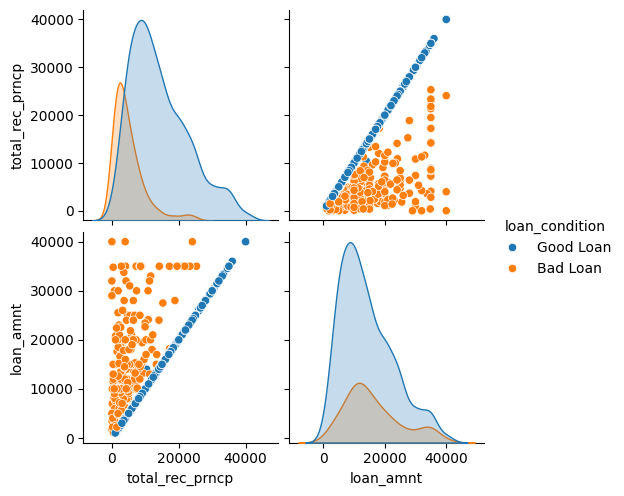

In [17]:
sns.pairplot(drop_df[['total_rec_prncp', 'loan_condition', 'loan_amnt']].sample(
    n=1000, random_state=42), hue='loan_condition')

In [18]:
direct_indicators = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

drop_df.drop(direct_indicators, axis=1, inplace=True)

In [19]:
# drop repeated features
# drop_df.drop(['loan_condition'], axis=1, inplace=True)
# drop_df.drop(['loan_status'], axis=1, inplace=True)
drop_df.drop(['emp_length'], axis=1, inplace=True)

drop_df.drop(['id', 'emp_title', 'url', 'title',
             'zip_code'], axis=1, inplace=True)

# unique values a categorical variable (object) has
drop_df.select_dtypes(include=["object"]).nunique()  # include/exclude

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
issue_d                 138
loan_status               8
pymnt_plan                2
purpose                  14
addr_state               50
earliest_cr_line        630
initial_list_status       2
last_pymnt_d            134
last_credit_pull_d      123
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
loan_condition            2
region                    5
dtype: int64

In [20]:
fillna_df = drop_df.copy()

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  # , 'income_category'
    fillna_df[column] = fillna_df.groupby(
        "region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the client is delinquent
fillna_df["pub_rec"] = fillna_df.groupby(
    "region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
fillna_df["total_acc"] = fillna_df.groupby(
    "region")["total_acc"].transform(lambda x: x.fillna(x.median()))

fillna_df["emp_length_int"] = fillna_df.groupby(
    "region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the client is located.
fillna_df["annual_inc"] = fillna_df.groupby(
    "region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
fillna_df["delinq_2yrs"] = fillna_df.groupby(
    "region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))
# for other, fill in with zero
fillna_df.fillna(0, inplace=True)
fillna_df.isnull().sum().max()  # Maximum number of nulls.

np.int64(0)

In [21]:
len(fillna_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
fillna_df['loan_condition_int'].value_counts(
)/len(fillna_df['loan_condition_int']) * 100

loan_condition_int
0    78.14247
1    21.85753
Name: count, dtype: float64

In [22]:
# Custom thresholds
RemoveOutlier_df = fillna_df.copy()
print("Dataset before removing outlier:", RemoveOutlier_df.shape)
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['annual_inc'] <= 250000]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['dti'] <= 50]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['open_acc'] <= 40]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['total_acc'] <= 80]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_util'] <= 120]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_bal'] <= 250000]
RemoveOutlier_df.reset_index(drop=True, inplace=True)
print("Dataset after removing outlier:", RemoveOutlier_df.shape)

RemoveOutlier_df.head().transpose()

Dataset before removing outlier: (61178, 99)
Dataset after removing outlier: (60253, 99)


,0,1,2,3,4
loan_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt_inv,28000.0,10650.0,3975.0,15000.0,8000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,6.62,25.11,17.99,6.24,9.67
...,...,...,...,...,...
debt_settlement_flag,N,N,N,N,N
loan_condition_int,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan
emp_length_int,10.0,10.0,2.0,8.0,10.0


In [23]:
target_col = target_variable = "loan_condition_int"

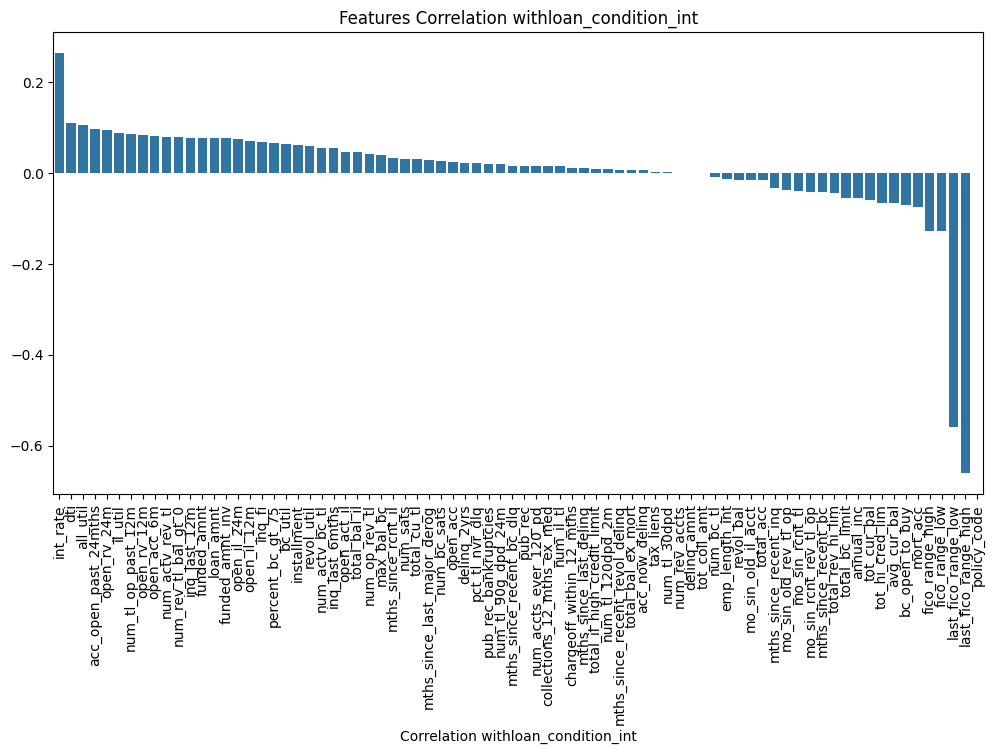

int_rate                0.263249
dti                     0.108784
all_util                0.104183
acc_open_past_24mths    0.095598
open_rv_24m             0.095068
                          ...   
fico_range_high        -0.127440
fico_range_low         -0.127441
last_fico_range_low    -0.559323
last_fico_range_high   -0.660207
policy_code                  NaN
Name: loan_condition_int, Length: 78, dtype: float64


In [24]:
corr_df = RemoveOutlier_df.copy()

# correlation with y
correlation_with_loan_condition = corr_df.select_dtypes(
    include=['int64', 'float64']).corr()[target_variable]
sorted_correlation = correlation_with_loan_condition.drop(
    target_variable).sort_values(ascending=False)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlation.index,
            y=sorted_correlation.values, orient='v')
plt.xlabel('Correlation with{}'.format(target_variable))
plt.title('Features Correlation with{}'.format(target_variable))
plt.xticks(rotation=90)
plt.show()
print(sorted_correlation)

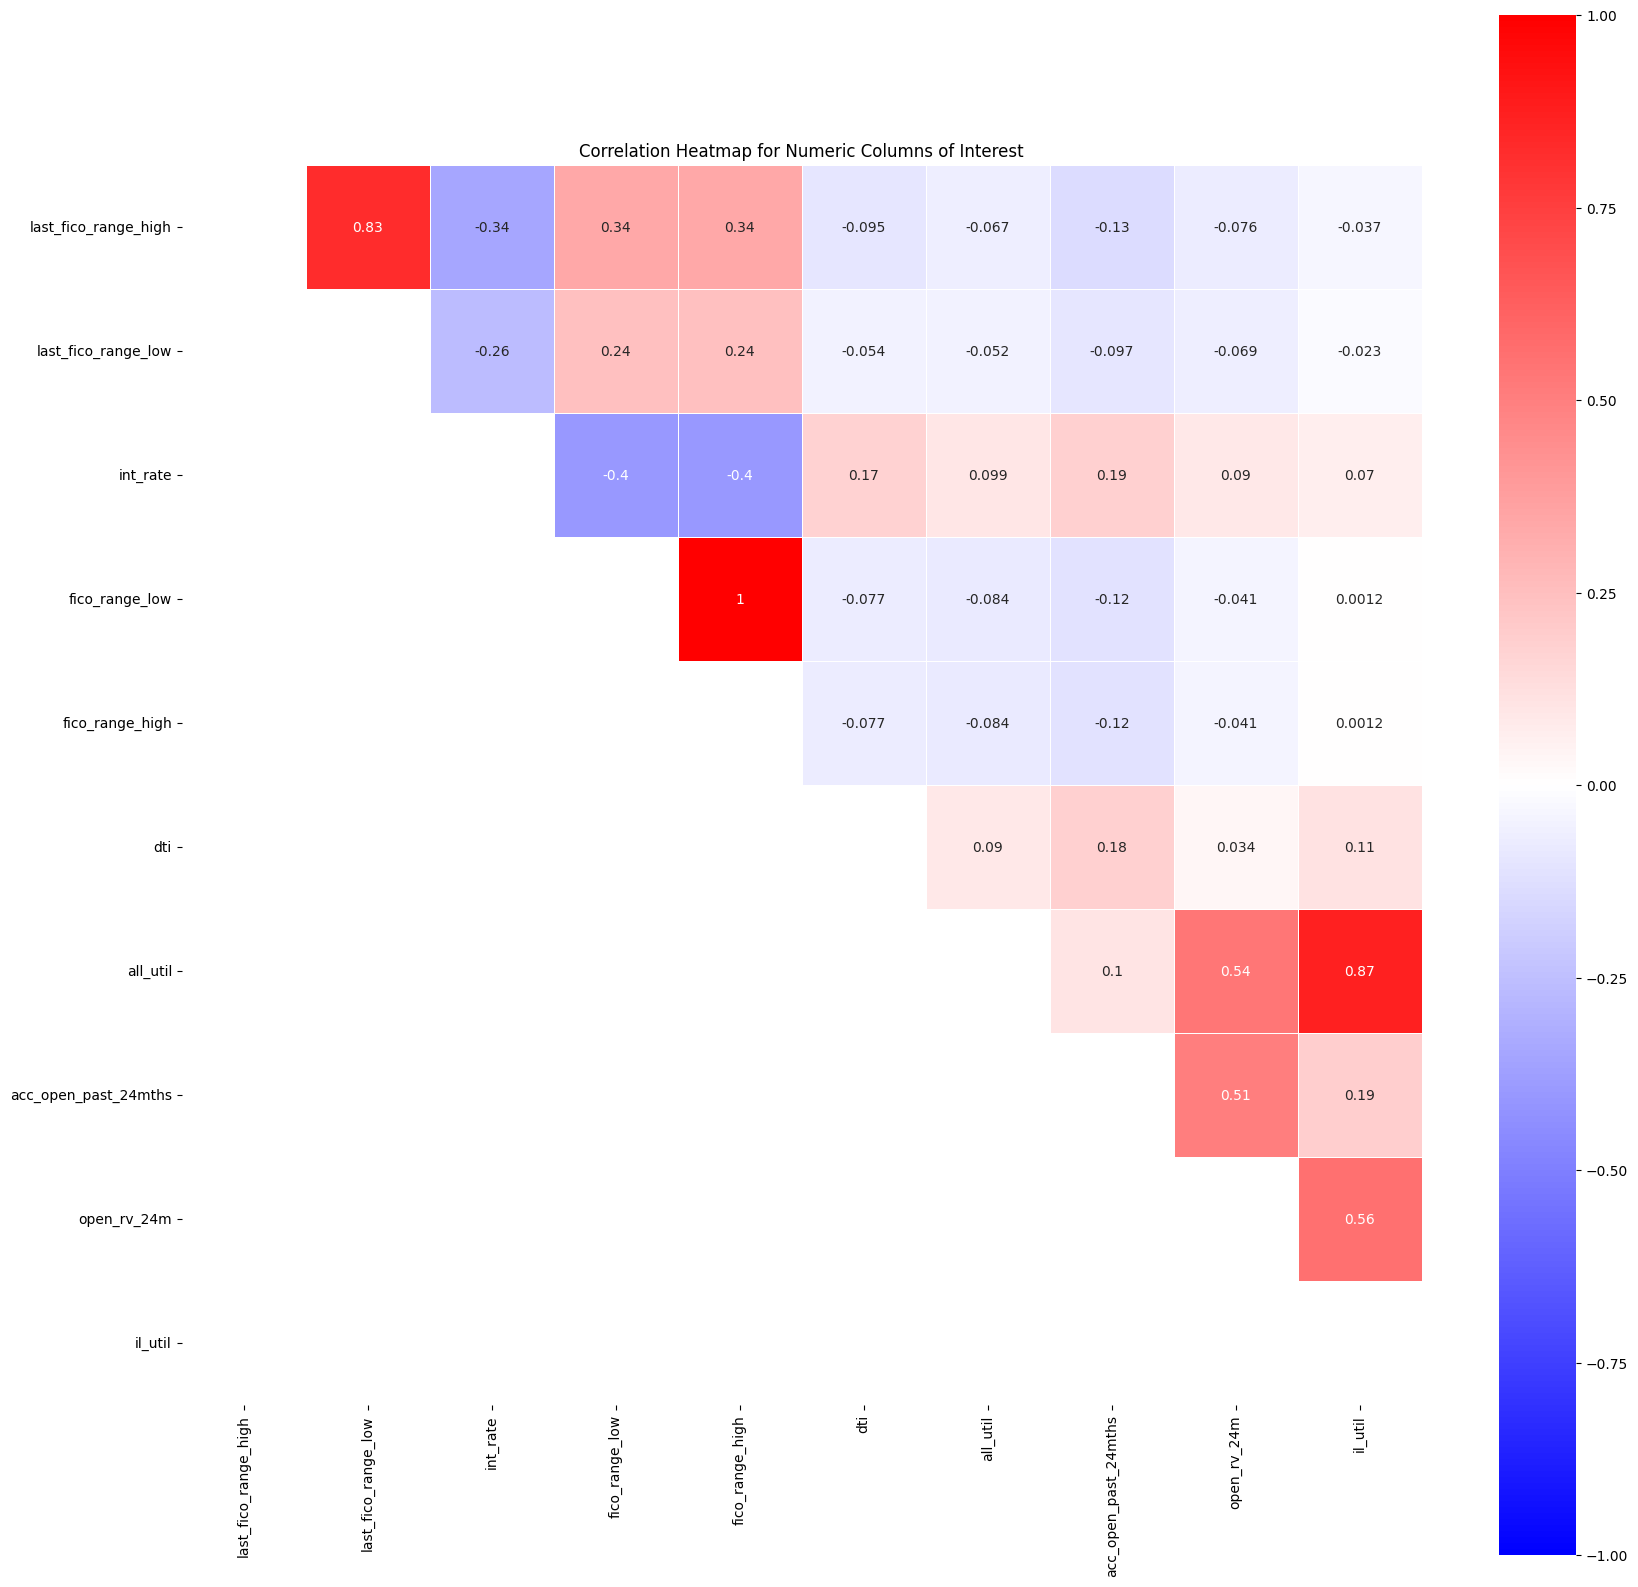

In [25]:
# Select the variables with the highest correlation with the dependent variable and explore the correlation between them
top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

plt.figure(figsize=(20, 20))
correlation_matrix = RemoveOutlier_df[top_variables].corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=-
            1, vmax=1, square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Numeric Columns of Interest')
plt.show()

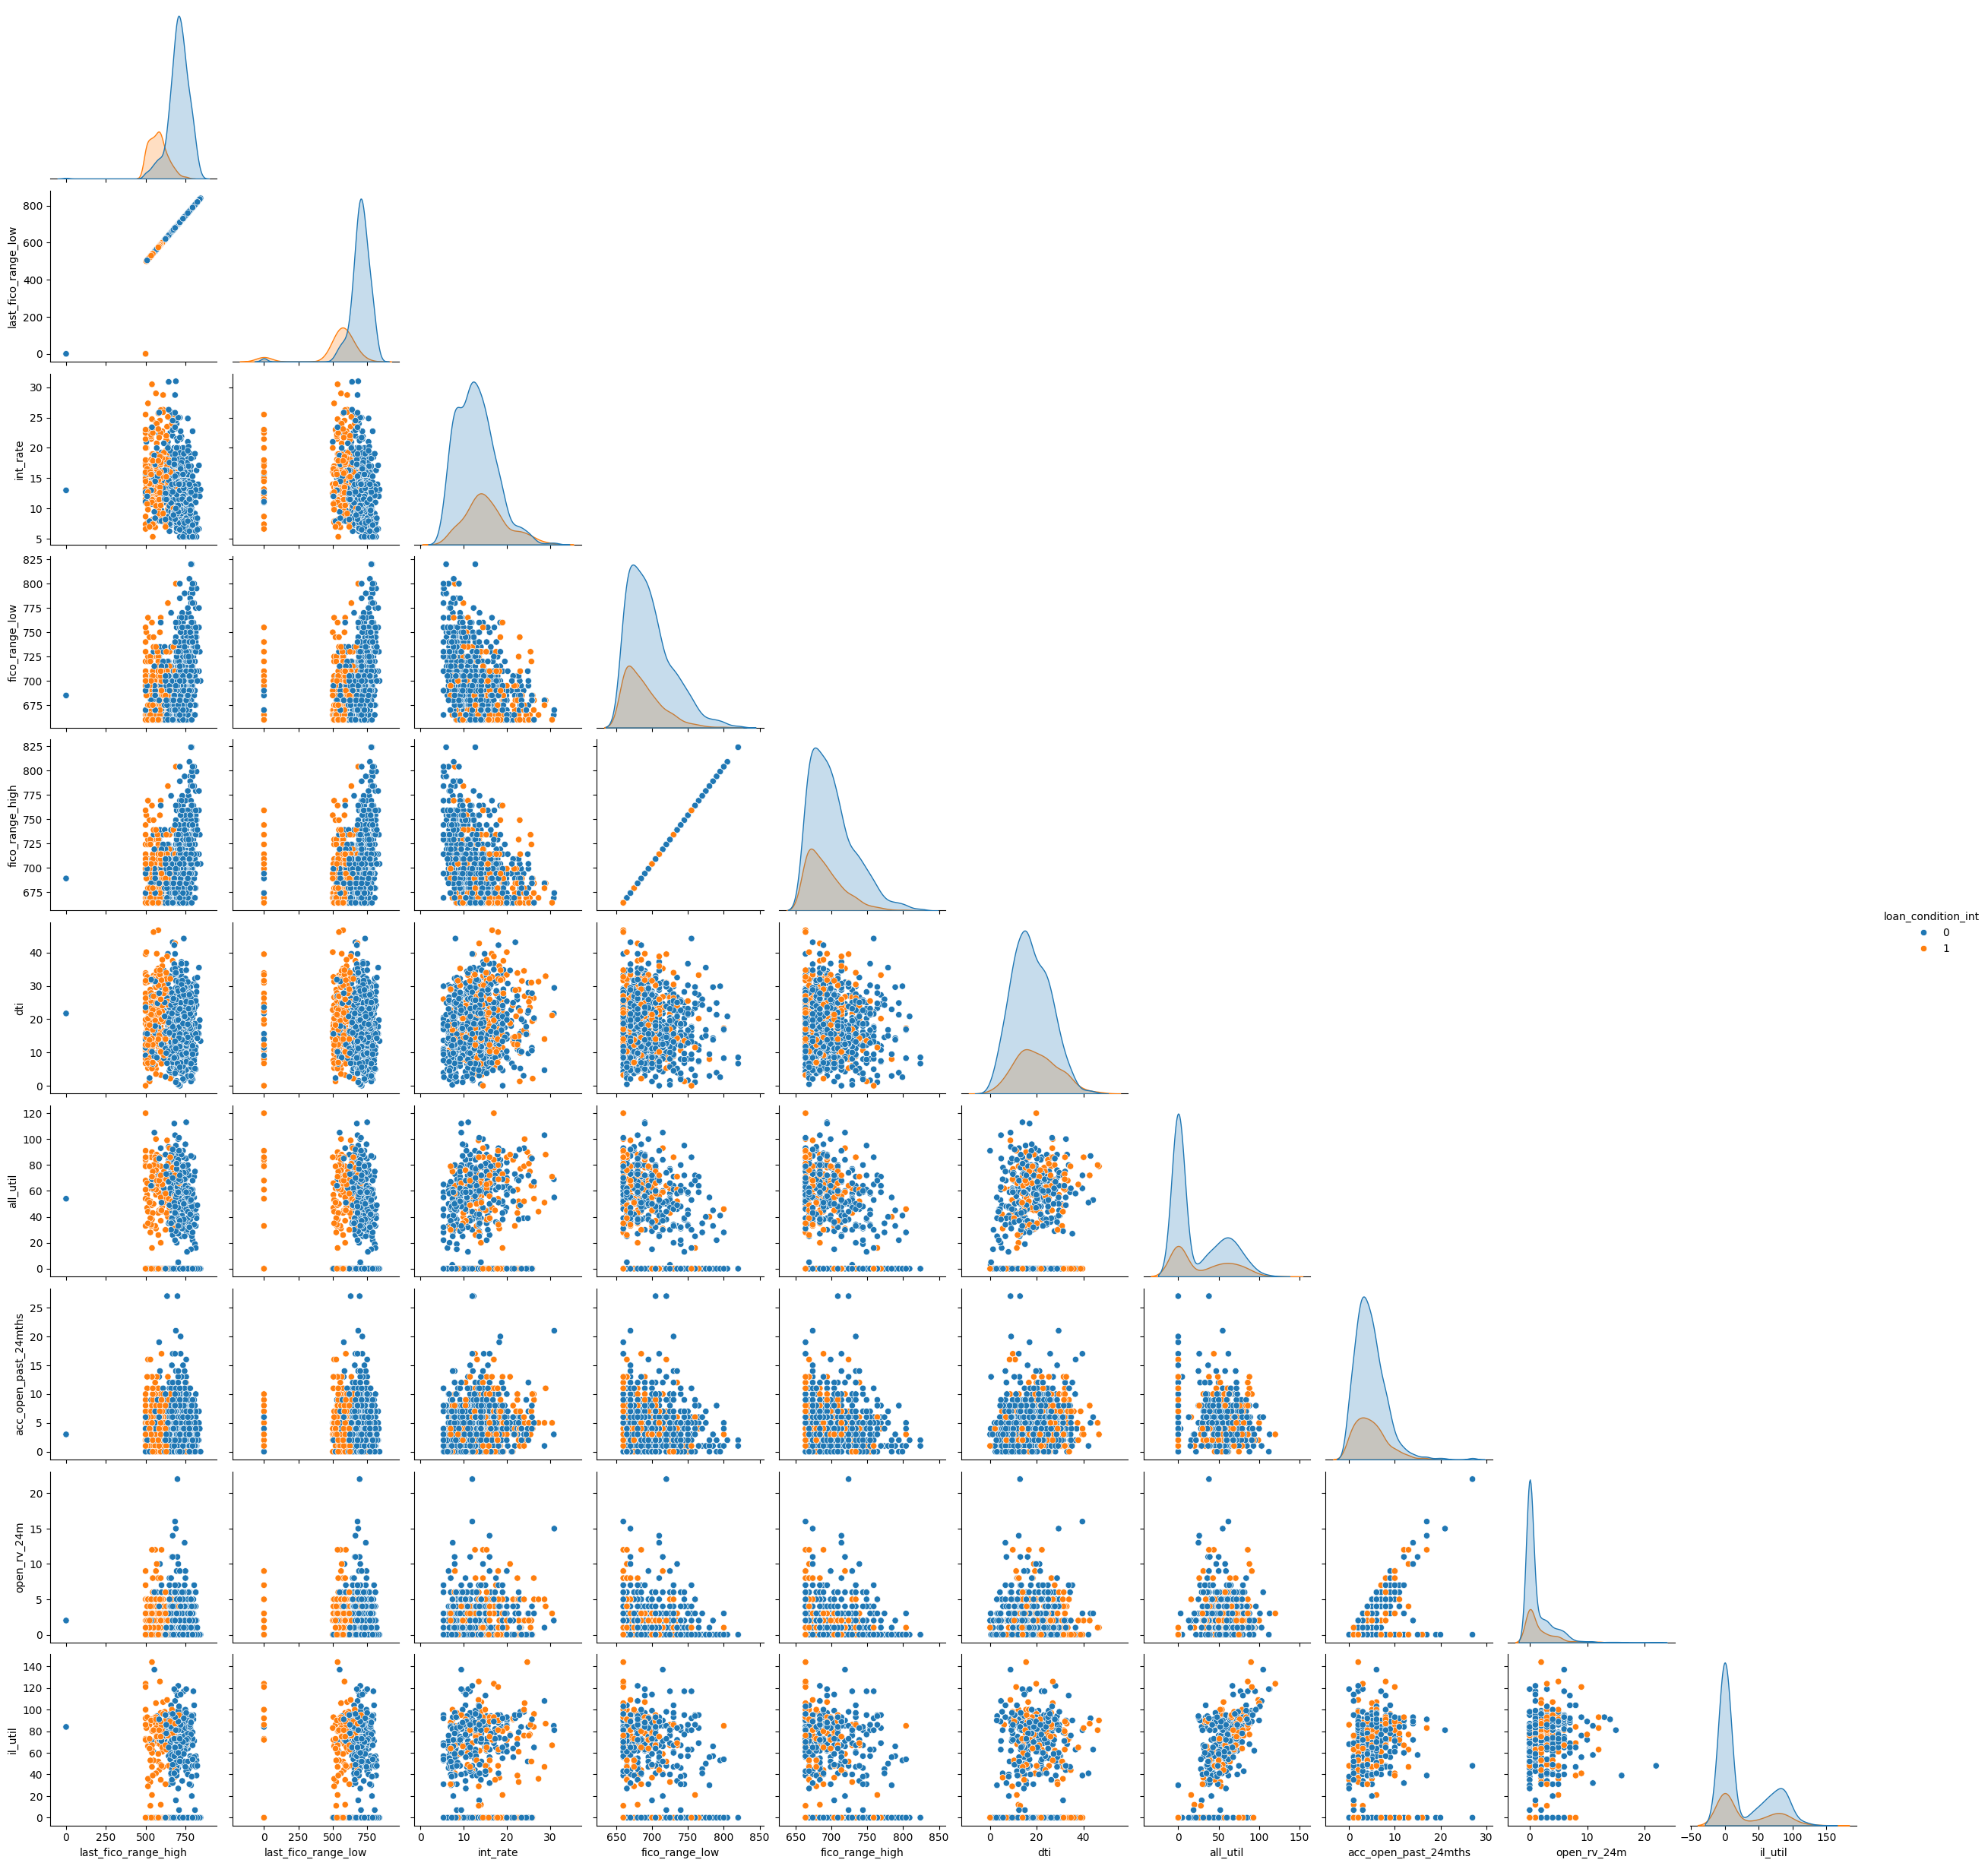

In [26]:
# # Further, explore the specific distribution of the relationship between variables under the action of the dependent variable loan_condition_int
# # This runs a bit slowly, so run with caution
sample_corr_df = corr_df[top_variables +
                         [target_variable]].sample(n=1000, random_state=42)
sns.pairplot(sample_corr_df, hue=target_variable, diag_kind='kde',corner=True)

In [27]:
TE_df = RemoveOutlier_df.copy()

In [28]:
# divide variables into numerical variables and categorical variables, categorical variables are divided into binary variables and multivariate variables
original_cols = TE_df.columns

cat_cols = TE_df.select_dtypes(include=['object']).columns.tolist()
num_cols = [col for col in TE_df.select_dtypes(
    exclude=['object']).columns.tolist() if col not in ['id', 'loan_condition_int']]

dual_cat_cols = [col for col in cat_cols if TE_df[col].nunique() <= 2]
multi_cat_cols = [col for col in cat_cols if TE_df[col].nunique() > 2]

multi_cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'region']

In [29]:
# pair all categorical features with another categorical feature
import itertools


def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(
            str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols


# binary encoding for dual_cat_cols
TE_df = pd.get_dummies(TE_df, columns=dual_cat_cols, drop_first=True)

# update dual_cat_cols
changed_columns = [col for col in TE_df.columns if col not in original_cols]
dual_cat_cols = changed_columns

TE_df.head().transpose()

,0,1,2,3,4
loan_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt,28000.0,10650.0,3975.0,15000.0,8000.0
funded_amnt_inv,28000.0,10650.0,3975.0,15000.0,8000.0
int_rate,6.62,25.11,17.99,6.24,9.67
installment,859.71,424.07,143.69,457.97,256.9
...,...,...,...,...,...
application_type_Joint App,False,False,False,False,False
hardship_flag_Y,False,False,False,False,False
disbursement_method_DirectPay,False,False,False,False,False
debt_settlement_flag_Y,False,False,False,False,False


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

# Specify test_size to account for 20%
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(TE_df, TE_df[target_col]):
    stratified_train = TE_df.loc[train_set]
    stratified_test = TE_df.loc[test_set]

train_df = stratified_train
test_df = stratified_test

# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

print(train_df[target_col].value_counts()/len(TE_df))
print(test_df[target_col].value_counts()/len(TE_df))
train_df.shape

loan_condition_int
0    0.625098
1    0.174896
Name: count, dtype: float64
loan_condition_int
0    0.156291
1    0.043716
Name: count, dtype: float64


(48202, 99)

In [72]:
test_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,emp_length_int,region,term_ 60 months,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,loan_condition_Good Loan
0,35000.0,35000.0,34875.0,17.86,886.11,D,D5,RENT,115000.0,Source Verified,...,2.0,NorthEast,True,False,False,False,False,False,False,False
1,10000.0,10000.0,9950.0,16.55,246.12,D,D2,MORTGAGE,60000.0,Not Verified,...,1.0,NorthEast,True,False,False,False,False,False,False,False
2,24000.0,24000.0,24000.0,17.76,606.32,D,D1,MORTGAGE,75000.0,Verified,...,7.0,NorthEast,True,False,False,False,False,False,False,True
3,9000.0,9000.0,9000.0,12.74,302.12,C,C1,OWN,98000.0,Verified,...,9.0,SouthEast,False,False,False,False,False,False,False,False
4,8000.0,8000.0,8000.0,14.33,274.71,C,C1,RENT,47299.0,Verified,...,2.0,NorthEast,False,False,False,False,False,False,False,True


In [74]:
selected_features = [
    'delinq_2yrs',
              'last_fico_range_high',
              'last_fico_range_low',
              'acc_now_delinq',
              'open_acc_6m',
              'total_bal_il',
              'il_util',
              'open_rv_12m',
              'all_util',
    'loan_condition_Good Loan'  # target column
]

# Filter rows where loan_condition_Good Loan == 0 (i.e., Bad Loans)
bad_loans = test_df[test_df['loan_condition_Good Loan'] == 0][selected_features]

# Show top 10 bad loans with selected columns
print(bad_loans.head(10))

    delinq_2yrs  last_fico_range_high  last_fico_range_low  acc_now_delinq  \
0           1.0                 579.0                575.0             0.0   
1           0.0                 504.0                500.0             0.0   
3           0.0                 574.0                570.0             0.0   
6           0.0                 579.0                575.0             0.0   
9           0.0                 664.0                660.0             0.0   
14          1.0                 544.0                540.0             0.0   
19          0.0                 564.0                560.0             0.0   
36          0.0                 514.0                510.0             0.0   
64          0.0                 599.0                595.0             0.0   
67          0.0                 514.0                510.0             0.0   

    open_acc_6m  total_bal_il  il_util  open_rv_12m  all_util  \
0           0.0           0.0      0.0          0.0       0.0   
1          

In [31]:
# separates the y(target variables) and X(features) for the training and testing datasets

train_y = train_df[[target_col]]
test_y = test_df[[target_col]]

train_X = train_df.drop(target_col, axis=1, inplace=False)
test_X = test_df.drop(target_col, axis=1, inplace=False)

train_X.shape

(48202, 98)

In [32]:
# Create a data set containing only multi-categorical variables
multi_cat_train_X = train_X[multi_cat_cols]
multi_cat_test_X = test_X[multi_cat_cols]

# Target encode categorical variables with smoothing method (on train set)
encoder = TargetEncoder(smoothing=0.2)
encoder.fit(multi_cat_train_X, train_y)

# Apply the same encoding rules on train and test set
encoded_multi_cat_train_X = encoder.transform(multi_cat_train_X)
encoded_multi_cat_test_X = encoder.transform(multi_cat_test_X)

encoded_train_X = pd.concat(
    [train_X.drop(columns=multi_cat_cols), encoded_multi_cat_train_X], axis=1)
encoded_test_X = pd.concat(
    [test_X.drop(columns=multi_cat_cols), encoded_multi_cat_test_X], axis=1)

encoded_train_X.head().transpose()

,0,1,2,3,4
loan_amnt,6400.0,12000.0,3000.0,13000.0,20000.0
funded_amnt,6400.0,12000.0,3000.0,13000.0,20000.0
funded_amnt_inv,6400.0,11925.0,3000.0,13000.0,20000.0
int_rate,11.49,16.45,13.18,6.03,15.61
installment,211.02,294.7,101.35,395.67,699.3
...,...,...,...,...,...
addr_state,0.208707,0.208707,0.205596,0.208707,0.210497
earliest_cr_line,0.212698,0.211679,0.277778,0.290043,0.219512
last_pymnt_d,0.170107,0.2,0.191358,0.273585,0.255259
last_credit_pull_d,0.297327,0.196957,0.297327,0.196957,0.196957


In [33]:
encoded_train_X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_s

In [34]:
scaler = StandardScaler()

# Fit and apply normalization on the training set
standardized_train_X = encoded_train_X.copy()
standardized_train_X[num_cols] = scaler.fit_transform(
    encoded_train_X[num_cols])

# Apply the same normalization rules on the test set
standardized_test_X = encoded_test_X.copy()
standardized_test_X[num_cols] = scaler.transform(encoded_test_X[num_cols])

standardized_train_X.head().transpose()

,0,1,2,3,4
loan_amnt,-0.921672,-0.272692,-1.315695,-0.156802,0.654422
funded_amnt,-0.921278,-0.272039,-1.315459,-0.156103,0.655446
funded_amnt_inv,-0.917497,-0.277428,-1.311386,-0.15289,0.658057
int_rate,-0.385615,0.655962,-0.030723,-1.53219,0.479566
installment,-0.869641,-0.546412,-1.293261,-0.156397,1.016429
...,...,...,...,...,...
addr_state,0.208707,0.208707,0.205596,0.208707,0.210497
earliest_cr_line,0.212698,0.211679,0.277778,0.290043,0.219512
last_pymnt_d,0.170107,0.2,0.191358,0.273585,0.255259
last_credit_pull_d,0.297327,0.196957,0.297327,0.196957,0.196957


In [35]:
undersampler = RandomUnderSampler(random_state=42)

# Undersampling the training set
standardized_train_X_undersample, train_y_undersample = undersampler.fit_resample(
    standardized_train_X, train_y)


print('standardized_train_X_undersample.shape',
      standardized_train_X_undersample.shape)
pd.value_counts(train_y_undersample.loan_condition_int).to_frame()

standardized_train_X_undersample.shape (21076, 98)


,count
loan_condition_int,
0,10538
1,10538


In [36]:
selector = VarianceThreshold(threshold=1)
selector.fit(standardized_train_X_undersample)

filtered_feature_names = standardized_train_X_undersample.columns[selector.get_support(
)]
standardized_train_X_undersample_filtered = standardized_train_X_undersample[
    filtered_feature_names]

standardized_train_X_undersample_filtered.shape

(21076, 45)

In [37]:
# modify this if you want to use SMOTE
to_wrap_train_X = standardized_train_X_undersample_filtered.copy()
train_y = train_y_undersample.copy()
nfeatures = len(to_wrap_train_X.columns)
nfeatures

45

In [38]:
vars_final = ['delinq_2yrs',
              'last_fico_range_high',
              'last_fico_range_low',
              'acc_now_delinq',
              'open_acc_6m',
              'total_bal_il',
              'il_util',
              'open_rv_12m',
              'all_util']

In [39]:
# Use wrapper to reduce variables
wrapped_train_X = to_wrap_train_X.filter(vars_final, axis=1)
wrapped_test_X = standardized_test_X.filter(vars_final, axis=1)


print("final train/test X shape (target encoded):",
      wrapped_train_X.shape, wrapped_test_X.shape)
print("final train/test y shape:", train_y.shape, test_y.shape)

final train/test X shape (target encoded): (21076, 9) (12051, 9)
final train/test y shape: (21076, 1) (12051, 1)


In [40]:
wrapped_train_X.head()

,delinq_2yrs,last_fico_range_high,last_fico_range_low,acc_now_delinq,open_acc_6m,total_bal_il,il_util,open_rv_12m,all_util
23221,-0.363123,1.762600,1.178302,-0.066139,-0.459917,0.709443,1.658486,-0.472138,0.925752
15705,-0.363123,0.104526,0.163679,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800
47795,-0.363123,0.657218,0.501886,-0.066139,0.622233,2.896657,0.840797,1.970405,1.052360
28493,-0.363123,0.595808,0.464308,-0.066139,0.622233,0.204070,1.140616,0.342043,0.419321
5921,-0.363123,-0.632395,-0.287265,-0.066139,-0.459917,-0.456882,-0.685557,-0.472138,-0.751800


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


def plot_confusion_matrix(mean_conf_matrix, xtick_labels=None, ytick_labels=None):
    fig, axes = plt.subplots(figsize=(8, 6))
    default_style = sns.axes_style()
    # sns.set(font_scale=1.5)
    ax = sns.heatmap(mean_conf_matrix.T, annot=True,
                     cmap='Blues', fmt=".1f", annot_kws={"size": 18})
    if xtick_labels:
        ax.set_xticklabels(xtick_labels)
    if ytick_labels:
        ax.set_yticklabels(ytick_labels)

    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')
    plt.title('Mean Confusion Matrix')
    sns.set_style(default_style)
    plt.show()


def calculate_scores(model, X_trn, y_trn, X_tst, y_tst):
    """Calculate various classification scores on the test set"""
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_tst, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_tst, y_pred)
    recall = recall_score(y_tst, y_pred)
    f1 = f1_score(y_tst, y_pred)

    y_pred_proba = model.predict_proba(X_tst)[:, 1]
    auc = roc_auc_score(y_tst, y_pred_proba)

    mask = y_tst['loan_condition_int'].astype(bool).values
    churn = y_pred_proba[mask]
    not_churn = y_pred_proba[~mask]
    ks = sps.ks_2samp(churn, not_churn)[0]

    return accuracy, auc, ks, conf_matrix, precision, recall, f1


def fit_first_level(models, X_trn, y_trn, X_tst):
    """
    Prepare first-level model fitting for stacking. Only used during model stacking.
    Output the predicted probabilities of the first-level models as features for the stacking model.
    """
    # Create dataframes to store predictions of the first-level models
    X2_trn = np.zeros((len(X_trn), 2 * len(models)))
    X2_tst = np.zeros((len(X_tst), 2 * len(models)))

    for i, model in enumerate(models.values()):
        print("Stacking with", model)

        model.fit(X_trn, y_trn)
        y_trn_pred_proba = model.predict_proba(X_trn)
        y_tst_pred_proba = model.predict_proba(X_tst)

        X2_trn[:, i*2:(i+1)*2] = y_trn_pred_proba
        X2_tst[:, i*2:(i+1)*2] = y_tst_pred_proba

    return X2_trn, X2_tst


def calculate_cv_scores(model, X, y, cv=5, stacking=False, models=None, verbose=False):
    """Calculate average k-fold cross-validated classification scores"""
    kf = KFold(n_splits=cv, shuffle=True)
    accuracy_scores = []
    auc_scores = []
    ks_scores = []
    conf_matrices = []  # Store confusion matrices for each fold
    precision_scores = []
    recall_scores = []
    f1_scores = []
    fold_count = 0

    for train_index, test_index in kf.split(X):
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]

        if stacking:
            # smote = False
            X_trn, X_tst = fit_first_level(models, X_trn, y_trn, X_tst)

        accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(
            model, X_trn, y_trn, X_tst, y_tst)
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        ks_scores.append(ks)
        conf_matrices.append(conf_matrix)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # if verbose:
        #     print(f"Fold {fold_count} accuracy, auc, ks:", accuracy, auc, ks)

        fold_count += 1

    # mean confusion matrix
    # / np.sum(np.mean(conf_matrices, axis=0)))
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    print(f"Mean Confusion Matrix for Model:\n", mean_conf_matrix)
    plot_confusion_matrix(mean_conf_matrix, xtick_labels=[
                          'Good Loan', 'Bad Loan'], ytick_labels=['Good Loan', 'Bad Loan'])

    return np.mean(accuracy_scores), np.mean(auc_scores), np.mean(ks_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)


def fit_models_summary(models, X, y, cv=5, smote=False, undersample=False):
    """
    Calculate average k-fold cross-validated classification scores for multiple models.
    Generate a summary dataframe.
    """
    baseline = pd.DataFrame(
        columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

    for name, model in models.items():
        # accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv, smote=False)
        # baseline.loc[name] = [accuracy, auc, ks, None, precision, recall, f1]

        accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(
            model, X, y, cv=cv)

        if smote:
            baseline.loc["{} (SMOTE)".format(name)] = [
                accuracy, auc, ks, precision, recall, f1]
        if undersample:
            baseline.loc["{} (undersample)".format(name)] = [
                accuracy, auc, ks, precision, recall, f1]

        print(f"{name} processed")

    return baseline

In [47]:
mss = 60
msl = int(mss / 2)

# Initialize Random Forest base model
base_rf = RandomForestClassifier(n_estimators=20, max_depth=10,
                                 min_samples_split=mss, min_samples_leaf=msl,
                                 random_state=42)

# Bagging wrapper
bagging_rf = BaggingClassifier(
    estimator=base_rf, n_estimators=10, random_state=42)

# Train the bagging model
start_time = datetime.now()
bagging_rf.fit(wrapped_train_X, train_y)

# Evaluate performance
accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(
    bagging_rf, wrapped_train_X, train_y, wrapped_test_X, test_y)

# Create performance DataFrame
performance_df = pd.DataFrame({
    'accuracy': [accuracy],
    'auc': [auc],
    'ks': [ks],
    'precision': [precision],
    'recall': [recall],
    'f1': [f1]
}, index=['Random Forest (bagging)'])

print("✅ Model training complete. Metrics:\n", performance_df)

# Save the trained bagging model to .pkl


✅ Model training complete. Metrics:
                          accuracy       auc        ks  precision   recall  \
Random Forest (bagging)  0.865405  0.931522  0.742845   0.639471  0.88079   

                               f1  
Random Forest (bagging)  0.740977  


Prediction for input data: [0]


In [55]:
import pickle

In [56]:
def save_model(model, path='../models/loan_default_model1.pkl'):
    with open(path, 'wb') as f:
        pickle.dump(model, f)

In [57]:
save_model(bagging_rf)
print("✅ Model saved to models/loan_default_model.pkl")

✅ Model saved to models/loan_default_model.pkl


In [43]:
wrapped_train_X.columns

Index(['delinq_2yrs', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'open_acc_6m', 'total_bal_il', 'il_util',
       'open_rv_12m', 'all_util'],
      dtype='object')

In [ ]:
print("Train class distribution:", train_y.value_counts())
train_y

Train class distribution: loan_condition_int
0                     10538
1                     10538
Name: count, dtype: int64


Mean Confusion Matrix for Model:
 [[1847.6  260. ]
 [ 292.  1815.6]]


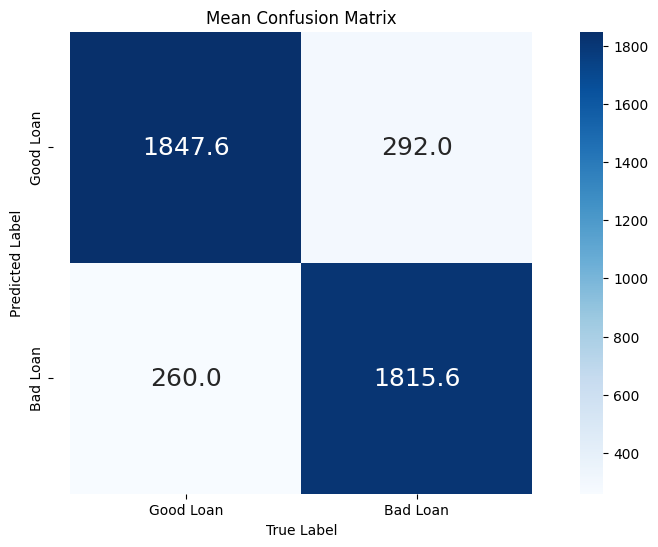

Logistic Regression processed
Mean Confusion Matrix for Model:
 [[1822.6  285. ]
 [ 265.2 1842.4]]


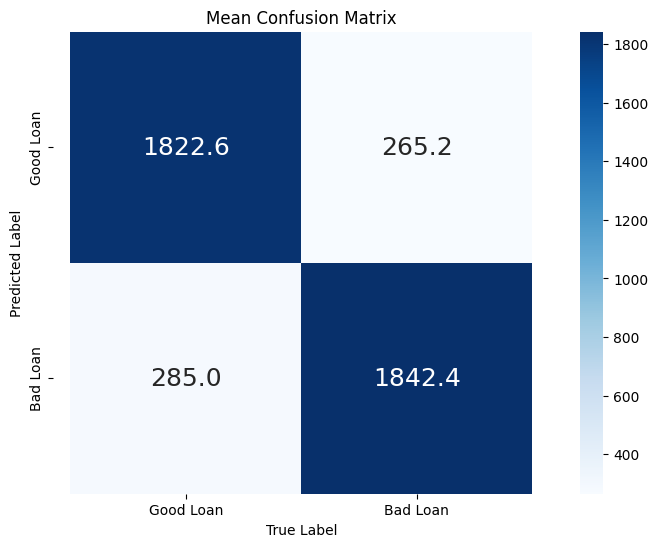

Decision Tree processed
Mean Confusion Matrix for Model:
 [[1979.4  128.2]
 [ 958.8 1148.8]]


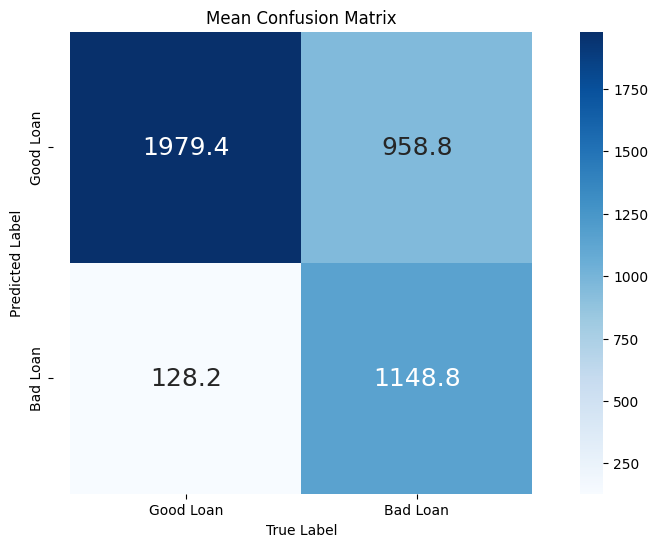

K Nearest Neighbors processed
Mean Confusion Matrix for Model:
 [[1813.2  294.4]
 [ 258.  1849.6]]


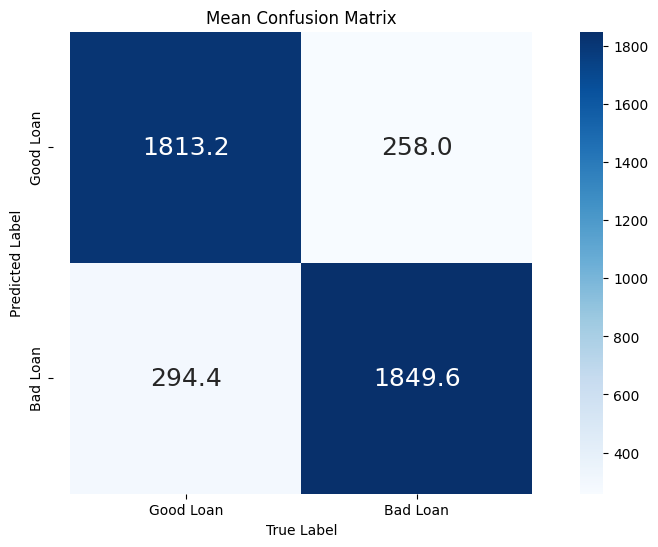

Random Forest processed
Mean Confusion Matrix for Model:
 [[1966.4  141.2]
 [ 745.2 1362.4]]


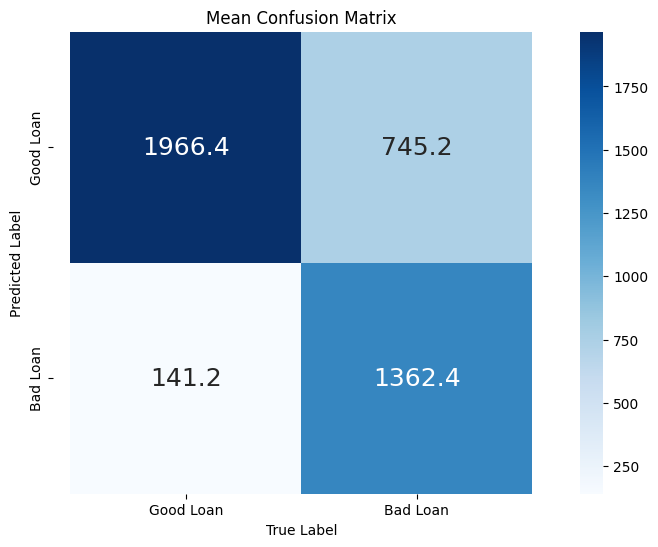

Gaussian Naive Bayes processed
[LightGBM] [Info] Number of positive: 8359, number of negative: 8501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 16860, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495789 -> initscore=-0.016845
[LightGBM] [Info] Start training from score -0.016845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

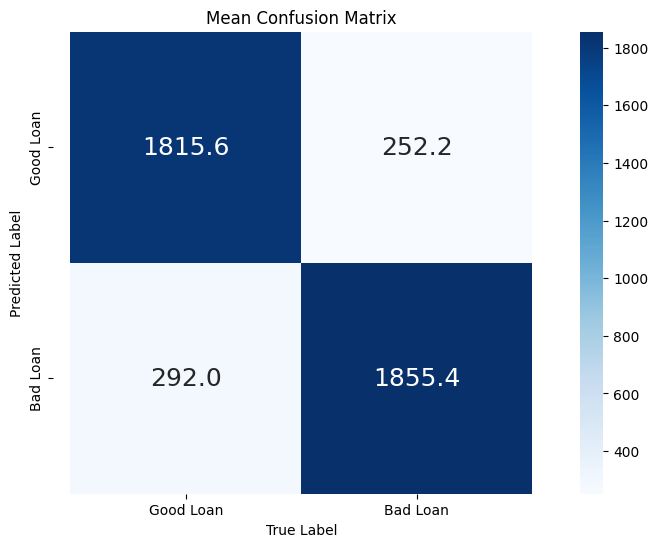

Light GBM processed
Mean Confusion Matrix for Model:
 [[1817.2  290.4]
 [ 253.  1854.6]]


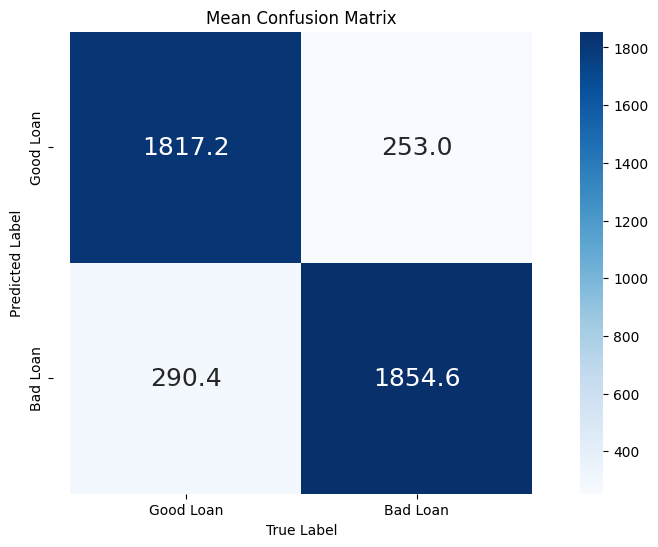

XGBoost processed
Mean Confusion Matrix for Model:
 [[1822.8  284.8]
 [ 256.6 1851. ]]


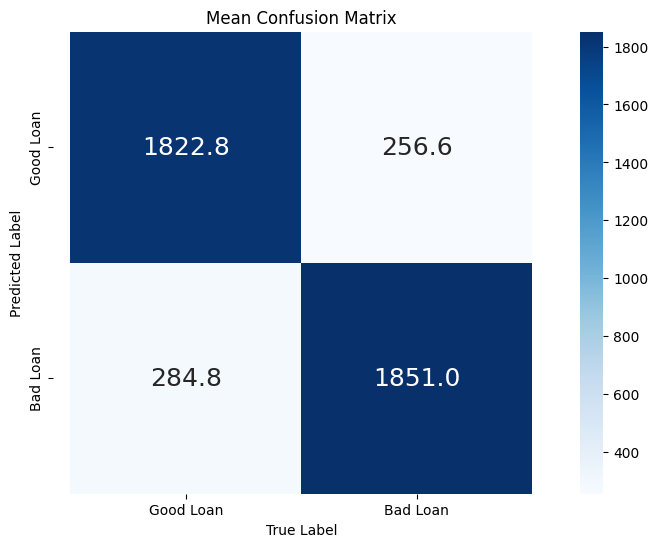

Gradient Boosting processed
Mean Confusion Matrix for Model:
 [[1814.2  293.4]
 [ 248.6 1859. ]]


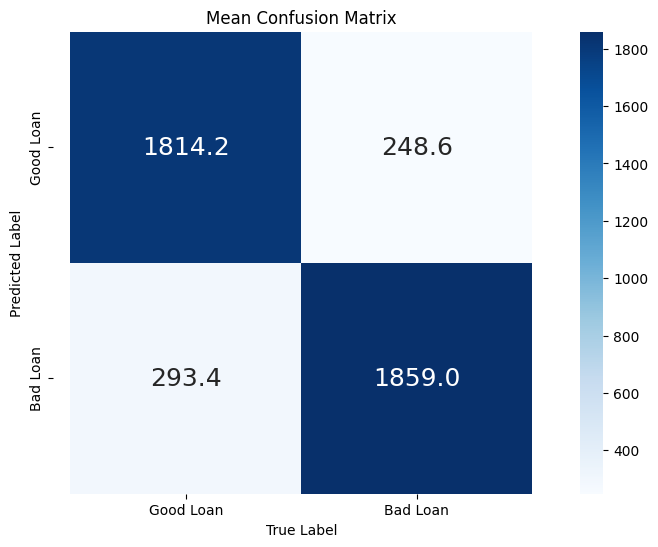

Neural Network processed


In [ ]:
# baseline_tgt = fit_models_summary(
#     models, wrapped_train_X, train_y, undersample=True)

In [ ]:
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=mss, min_samples_leaf=msl),
#     #  'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
#     'Random Forest': RandomForestClassifier(n_estimators=20, max_depth=10),
#     #  'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
#     'Light GBM': LGBMClassifier(n_estimators=50, max_depth=3),
#     'XGBoost': XGBClassifier(n_estimators=50, max_depth=3),
#     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, max_depth=3),
#     "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 10))
# }

In [ ]:
# performance_df = pd.DataFrame(
#     columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

# bagging_models = {}

# start_time_model_bagging = datetime.now()

# for model_name, model in models.items():
#     print("processing: ", model_name)
#     bagging_model = BaggingClassifier(
#         estimator=model, n_estimators=10, random_state=42)

#     # Training Bagging model
#     bagging_model.fit(wrapped_train_X, train_y)

#     bagging_models[model_name + '_bagging'] = bagging_model
#     accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(
#         bagging_model, wrapped_train_X, train_y, wrapped_test_X, test_y)
#     performance_dict = {
#         'accuracy': accuracy,
#         'auc': auc,
#         'ks': ks,
#         'precision': precision,
#         'recall': recall,
#         'f1': f1
#     }
#     performance_df.loc[model_name + ' (bagging)'] = performance_dict

# performance_df

processing:  Logistic Regression
processing:  Decision Tree
processing:  Random Forest
processing:  Light GBM
[LightGBM] [Info] Number of positive: 10538, number of negative: 10538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 21076, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499953 -> initscore=-0.000190
[LightGBM] [Info] Start training from score -0.000190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

,accuracy,auc,ks,precision,recall,f1
Logistic Regression (bagging),0.872625,0.927658,0.738974,0.660157,0.859909,0.746908
Decision Tree (bagging),0.864659,0.930237,0.741226,0.638116,0.879651,0.739665
Random Forest (bagging),0.864410,0.930522,0.741847,0.637137,0.881929,0.739809
Light GBM (bagging),0.870882,0.931836,0.743367,0.653386,0.871678,0.746910
XGBoost (bagging),0.870467,0.931680,0.742938,0.652199,0.872817,0.746550
Gradient Boosting (bagging),0.870301,0.931707,0.743338,0.652001,0.872058,0.746143
Neural Network (bagging),0.868144,0.931976,0.743936,0.645991,0.877752,0.744246
